In [1]:
import numpy as np
import cvxpy as cp
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython import display

from agents import DT_Kin_Bike_Agent
from FTOCP_coop import agent_FHOCP

In [2]:
model_dt = 0.01
control_dt = 0.05

n_control = int(np.around(control_dt/model_dt))

x_0 = np.array([-1.0, -5.0, 0.0, 0.0])
x_f = np.array([0.0, 5.0, 3.0*np.pi/4.0, 0.0])

waypts = [np.array([6.0, 0.0, np.pi/2.0, 2.0])]
# waypts = []
waypts.append(x_f)
waypt_idx = 0

l_r = 0.5
l_f = 0.5
w = 0.5

Q = np.diag([10.0, 10.0, 20.0, 10.0])
R = np.diag([1.0, 50.0])
Rd = 1.0*np.eye(2)
P = Q
N = 30

dyn_agent = DT_Kin_Bike_Agent(l_r, l_f, w, model_dt, x_0, x_f)
ctr_agent = DT_Kin_Bike_Agent(l_r, l_f, w, control_dt, x_0, x_f)

# fhocp = agent_FHOCP(Q, P, R, Rd, N, dyn_agent, x_ref=waypts[0])
fhocp = agent_FHOCP(Q, P, R, Rd, N, ctr_agent, x_ref=waypts[0])

In [3]:
x_traj = [x_0]
u_traj = []

x_t = np.squeeze(x_0)
t = 0
t_span = [0]

for i in range(500):
#     print(i)
    
    t_span.append(t)
    
    if np.mod(i, n_control) == 0:
        x_pred, u_pred = fhocp.solve(x_t, t, verbose=False)
        u_t = u_pred[:,0]
        print(i, la.norm(x_t[:2] - waypts[waypt_idx][:2]), x_t[0], x_t[1], x_t[2]*180.0/np.pi, x_t[3])
#         print(x_pred)
    
    x_tp1 = dyn_agent.sim(x_t, u_t)
    
    x_traj.append(x_tp1)
    u_traj.append(u_t)
    
    d = la.norm(x_tp1[:2] - waypts[waypt_idx][:2])
    if d <= 0.5:
        if waypt_idx < len(waypts)-1:
            print('Waypoint %i reached' % waypt_idx)
            waypt_idx += 1
            fhocp.update_x_ref(waypts[waypt_idx])
        else:
            print('Goal state reached')
            break
            
    t += model_dt
    x_t = x_tp1

x_traj = np.array(x_traj)
u_traj = np.array(u_traj)

(0, 8.602325267042627, -1.0, -5.0, 0.0, 0.0)
(5, 8.602203141565838, -0.999849919017203, -5.0, 0.0, 0.007504049139844459)
(10, 8.601652157207312, -0.9991746072457588, -4.999997465086896, 0.00014520156802915406, 0.02250975274375369)
(15, 8.600359841504691, -0.9975990347474619, -4.999979715185651, 0.0011613333591639966, 0.0450189947607339)
(20, 8.59800942374962, -0.9947483854666199, -4.999926106943919, 0.004226073559426407, 0.07502917310014551)
(25, 8.594279726619256, -0.9902482781878832, -4.999807299153646, 0.011002085915689535, 0.11254000715655886)
(30, 8.588845195427673, -0.9837248162249778, -4.999584930998215, 0.023638176535104655, 0.15755253204711164)
(35, 8.58141797962145, -0.9748549758847531, -4.999213198728974, 0.044652756478524756, 0.2075525299373292)
(40, 8.57185366113682, -0.9634915012131412, -4.998645946701673, 0.07650185052237836, 0.25755241970411086)
(45, 8.560132311827319, -0.9496372938576663, -4.997840201508329, 0.12135929154122216, 0.3075522965924453)
(50, 8.5462337068708

(400, 3.486333688236365, 3.9749487549870954, -2.8379024015641305, 30.839963074251223, 2.0362770744240017)
(405, 3.3908878771795643, 4.0587349880016435, -2.780217752046475, 31.202029869130236, 2.031762891059645)
(410, 3.295535394221065, 4.141495989365982, -2.721491572101787, 31.607111635950112, 2.0263552594002183)
(415, 3.200854825125307, 4.224080101557162, -2.6630020889670245, 31.96681521234227, 2.020404742420436)
(420, 3.1069290781877825, 4.306512320266552, -2.6048239432790474, 32.28151072153885, 2.0141406253514145)
(425, 3.013847813629155, 4.388819257716269, -2.547032638073427, 32.551431237578775, 2.0072791135939534)
(430, 2.921101136379008, 4.470101941259378, -2.4884219454940526, 32.86373073661636, 1.9995982227730686)
(435, 2.8287078747807097, 4.5502742802486225, -2.4289675951600813, 33.21827644514556, 1.9912074027990108)
(440, 2.7366820725100354, 4.629264851506348, -2.3686523422997117, 33.61428421646666, 1.9824639578087029)
(445, 2.64563739554248, 4.70796615265195, -2.3086891878292

Text(0,0.5,'a')

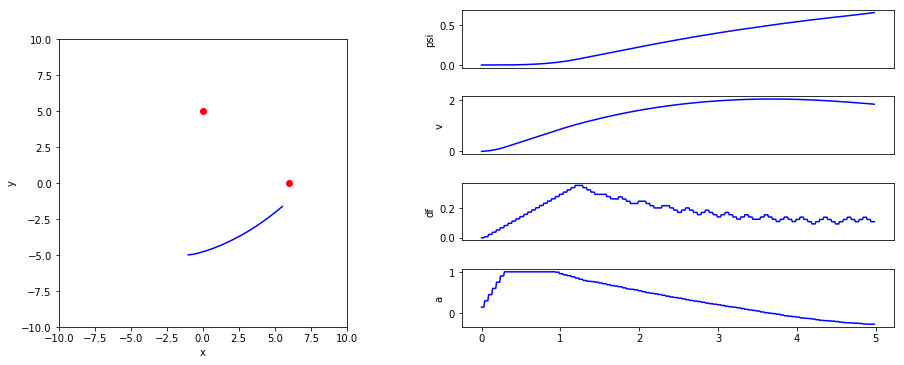

In [4]:
fig = plt.figure()

xy_ax = fig.add_axes([0, 0, 1, 1])
psi_ax = fig.add_axes([1.1, 0.9, 1, 0.2])
psi_ax.set_xticks([])
v_ax = fig.add_axes([1.1, 0.6, 1, 0.2])
v_ax.set_xticks([])
df_ax = fig.add_axes([1.1, 0.3, 1, 0.2])
df_ax.set_xticks([])
a_ax = fig.add_axes([1.1, 0.0, 1, 0.2])

xy_ax.plot(x_traj[:,0], x_traj[:,1], 'b-')
xy_ax.set_xlabel('x')
xy_ax.set_ylabel('y')
xy_ax.set_xlim([-10, 10])
xy_ax.set_ylim([-10, 10])
xy_ax.set_aspect('equal')    
for j in range(len(waypts)):
    xy_ax.plot(waypts[j][0], waypts[j][1], 'ro')

psi_ax.plot(t_span, x_traj[:,2], 'b-')
psi_ax.set_ylabel('psi')

v_ax.plot(t_span, x_traj[:,3], 'b-')
v_ax.set_ylabel('v')

df_ax.plot(t_span[:-1], u_traj[:,0], 'b-')
df_ax.set_ylabel('df')

a_ax.plot(t_span[:-1], u_traj[:,1], 'b-')
a_ax.set_ylabel('a')

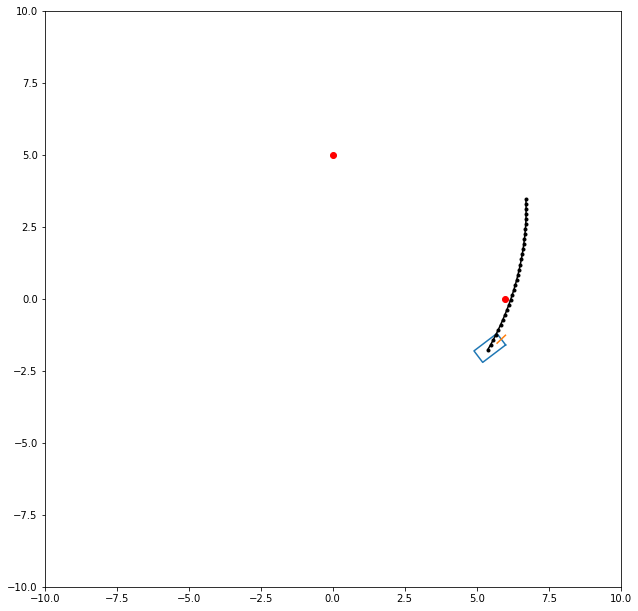

500


IndexError: index 500 is out of bounds for axis 0 with size 500

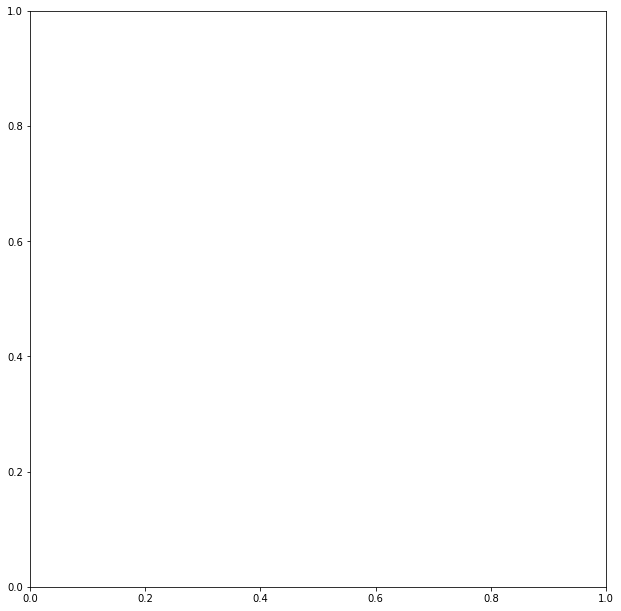

In [5]:
f = plt.figure()
ax = f.add_axes([0, 0, 2, 2])
control_counter = -1

for i in range(0,x_traj.shape[0],n_control):
    print(i)
    
    ax.clear()
    
    x_t = x_traj[i,:]
    u_t = u_traj[i,:]
    
    car_x = [x_t[0] + l_f*np.cos(x_t[2]) + w*np.sin(x_t[2])/2, 
            x_t[0] + l_f*np.cos(x_t[2]) - w*np.sin(x_t[2])/2,
            x_t[0] - l_r*np.cos(x_t[2]) - w*np.sin(x_t[2])/2,
            x_t[0] - l_r*np.cos(x_t[2]) + w*np.sin(x_t[2])/2,
            x_t[0] + l_f*np.cos(x_t[2]) + w*np.sin(x_t[2])/2]
    car_y = [x_t[1] + l_f*np.sin(x_t[2]) - w*np.cos(x_t[2])/2, 
            x_t[1] + l_f*np.sin(x_t[2]) + w*np.cos(x_t[2])/2,
            x_t[1] - l_r*np.sin(x_t[2]) + w*np.cos(x_t[2])/2,
            x_t[1] - l_r*np.sin(x_t[2]) - w*np.cos(x_t[2])/2,
            x_t[1] + l_f*np.sin(x_t[2]) - w*np.cos(x_t[2])/2]
    
    wheel_x = [x_t[0] + l_f*np.cos(x_t[2]) + 0.2*np.cos(x_t[2]+u_t[0]), x_t[0] + l_f*np.cos(x_t[2]) - 0.2*np.cos(x_t[2]+u_t[0])]
    wheel_y = [x_t[1] + l_f*np.sin(x_t[2]) + 0.2*np.sin(x_t[2]+u_t[0]), x_t[1] + l_f*np.sin(x_t[2]) - 0.2*np.sin(x_t[2]+u_t[0])]
    ax.plot(car_x, car_y)
    ax.plot(wheel_x, wheel_y)
    
    for j in range(len(waypts)):
        ax.plot(waypts[j][0], waypts[j][1], 'ro')
    
    if np.mod(i, n_control) == 0:
        control_counter += 1
    ax.plot(fhocp.x_preds[0,:,control_counter], fhocp.x_preds[1,:,control_counter], 'k.-')
    
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_aspect('equal')
    plt.draw()
    
    display.clear_output(wait=True)
    display.display(f)
    

In [ ]:
A = np.array([[ 1.        ,  0.        , -0.3945411 , -0.00567603],
       [ 0.        ,  1.        , -0.04507999,  0.04967678],
       [ 0.        ,  0.        ,  1.        ,  0.00244248],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])
print(la.eig(A))

In [ ]:
A = np.random.randn(4,4)
B = np.random.randn(4,2)
c = np.random.randn(4)

A_pows = [la.matrix_power(A, i) for i in range(10+1)]
A_pows = np.concatenate(A_pows, axis=1)
B_mat = np.tile(B, (10,1))
c_vec = np.tile(c, 10)

print(A_pows.shape)
print(B_mat.shape)
print(c_vec.shape)

print(A_pows[:,-4:], A_pows[:,:4])
print(A_pows[:,:-4].dot(c_vec).shape)